In [1]:
import h5py
from matplotlib import pyplot as plt

In [4]:
base = '../../'

with h5py.File(f'{base}sdss_galaxy_spec.hdf5', 'r') as fp :

    print(list(fp['raw'].keys()))
    # redshift
    z = fp['raw']['z'][...]

    # physical properties
    age = fp['raw']['age'][...]
    metallicity = fp['raw']['metallicity'][...]
    smass = fp['raw']['smass'][...]

    # spectra, including error bars
    wavelength = fp['raw']['wavelength'][...]
    specs = fp['raw']['spec'][...]
    specerrs = fp['raw']['specerr'][...]

['age', 'dec', 'fiberid', 'metallicity', 'mjd', 'plateid', 'ra', 'smass', 'spec', 'specerr', 'wavelength', 'z', 'zerr']


In [12]:
import numpy as np
def band(spectrum, wavelength, errs):
    a = np.average(spectrum[(wavelength>4000)&(wavelength<5000)], weights = 1/errs[(wavelength>4000)&(wavelength<5000)])
    b = np.average(spectrum[(wavelength>5000)&(wavelength<6000)], weights = 1/errs[(wavelength>5000)&(wavelength<6000)])
    c = np.average(spectrum[(wavelength>6000)&(wavelength<7000)], weights = 1/errs[(wavelength>6000)&(wavelength<7000)])
    d = np.average(spectrum[(wavelength>7000)&(wavelength<8000)], weights = 1/errs[(wavelength>7000)&(wavelength<8000)])
    e = np.average(spectrum[(wavelength>8000)&(wavelength<9000)], weights = 1/errs[(wavelength>8000)&(wavelength<9000)])
    f = np.average(spectrum[(wavelength>9000)&(wavelength<10000)], weights = 1/errs[(wavelength>9000)&(wavelength<10000)])
    return a,b,c,d,e,f
    

In [32]:
def coarse(spec, wavelength, err, bin):
    idx = np.digitize(wavelength, bin)
    nbins = len(bin) - 1

    # 重み = 1/σ²
    w = 1.0 / (err**2 + 1e-30)

    # 各ビンごとの Σ(w*flux), Σ(w)
    num = np.bincount(idx, weights=w*spec, minlength=nbins)
    den = np.bincount(idx, weights=w, minlength=nbins)

    avg = num / den
    avg[den == 0] = np.nan  # データがないビンは NaN

    bin_centers = 0.5 * (bin[:-1] + bin[1:])
    return bin_centers, avg[1:-1:]

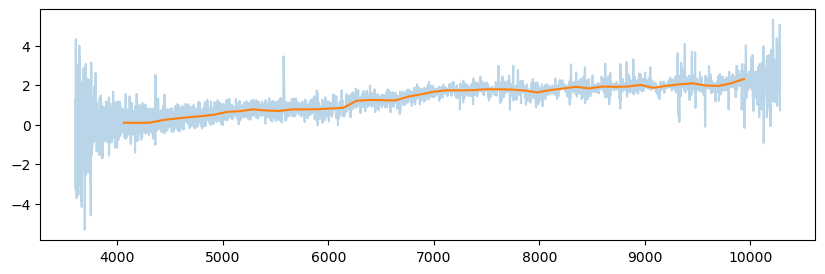

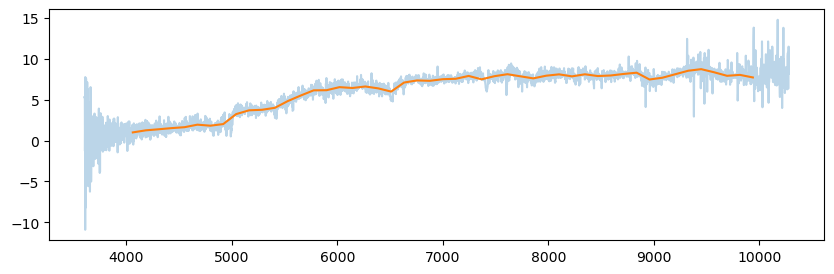

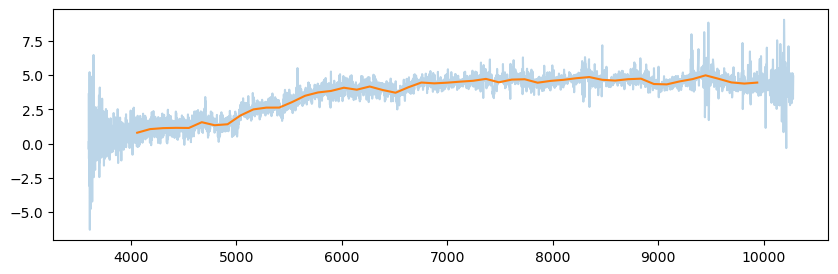

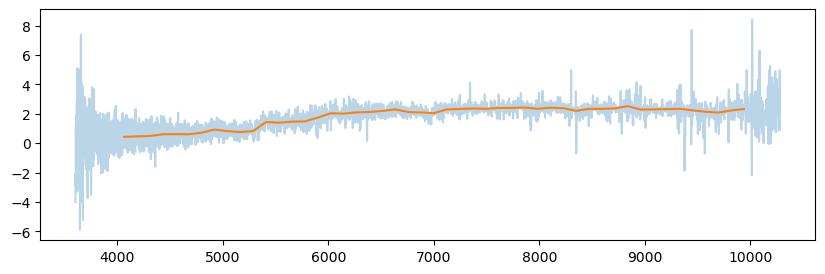

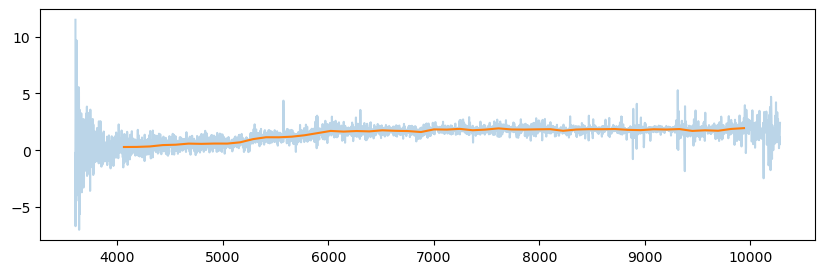

In [34]:
for i in range(5):
    spec = specs[i]
    err = specerrs[i]
    fig = plt.figure(figsize=(10, 3))
    bin = np.linspace(4000, 10000, 50)
    _bin, flux = coarse(spec, wavelength, err, bin)
    plt.plot(wavelength, spec, alpha=0.3)
    plt.plot(_bin, flux)

0.29262807965278625 0.7364850044250488 1.2620301246643066 1.749118685722351 1.8688015937805176 2.0168700218200684
1.6021255254745483 4.6105570793151855 6.777166843414307 7.754636287689209 7.991271495819092 8.092138290405273
1.2439019680023193 2.9746286869049072 4.129040718078613 4.5954999923706055 4.692251682281494 4.507218837738037
0.6401190161705017 1.2351726293563843 2.1238410472869873 2.346127986907959 2.3712761402130127 2.2595622539520264
0.48420995473861694 1.0762985944747925 1.6982433795928955 1.851985216140747 1.8247262239456177 1.824314832687378


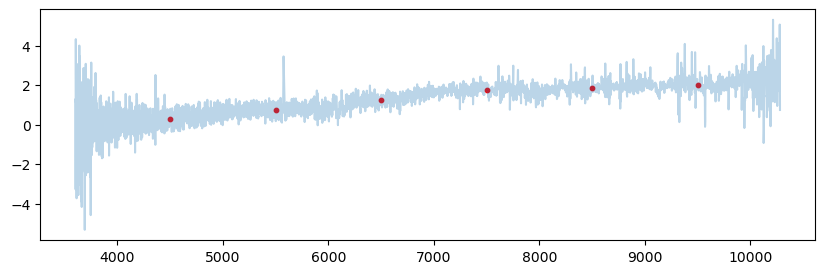

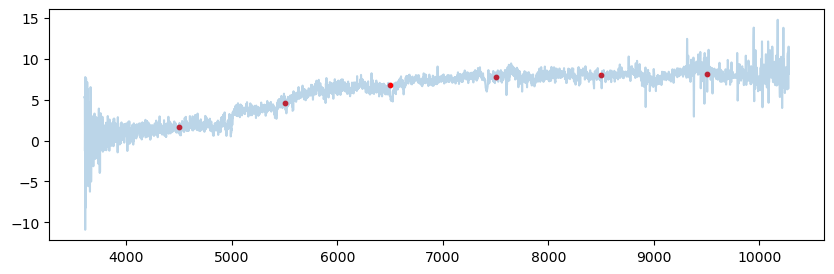

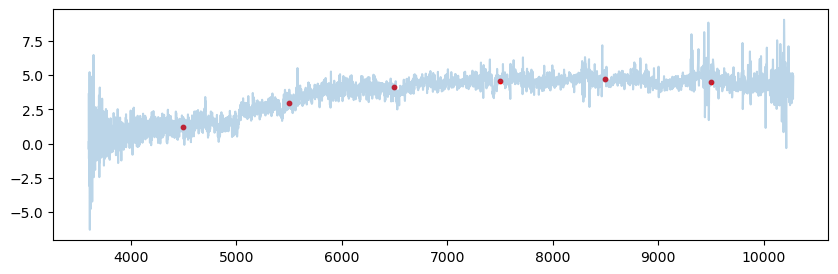

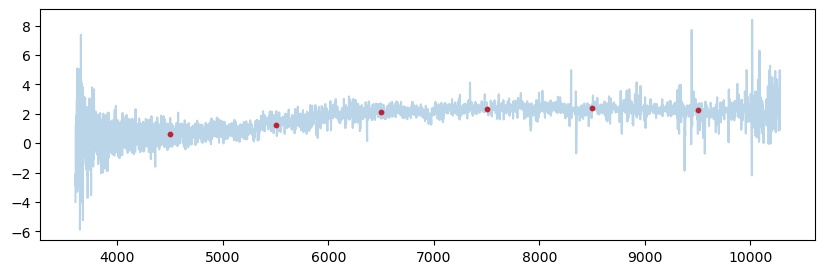

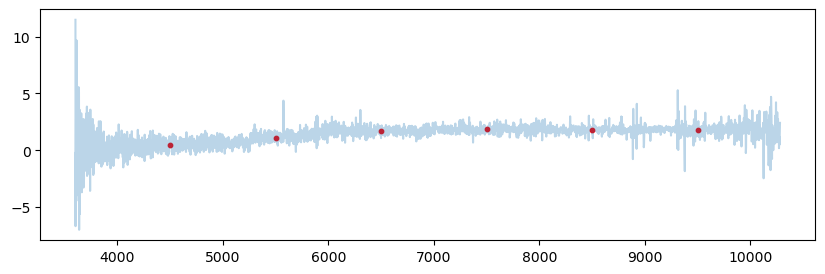

In [24]:
for i in range(5):
    spec = specs[i]
    err = specerrs[i]
    fig = plt.figure(figsize=(10, 3))
    a,b,c,d,e,f = band(spec, wavelength, err)
    print(f"{a} {b} {c} {d} {e} {f}")
    plt.plot(wavelength, spec, alpha=0.3)
    plt.scatter([4500, 5500, 6500, 7500, 8500, 9500], [a, b,c, d, e, f], color='red', s=10)